In [1]:
from typing import Dict, List, Annotated
import numpy as np
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
DB_SEED_NUMBER = 42
ELEMENT_SIZE = np.dtype(np.float32).itemsize
DIMENSION = 70

In [4]:
def generate_database(size: int, dimension: int, seed_number: int, file_name: str, batch_size: int = int(1e5)) -> None:
    rng = np.random.default_rng(seed_number)

    # Open the file once for writing
    with open(file_name, "a") as fout:
        for batch_idx in range(size // batch_size):
            # Generate a batch of random vectors
            vectors = rng.random((batch_size, dimension), dtype=np.float32)

            # Format the batch into CSV rows
            records = [
                f"{i + batch_idx * batch_size},{','.join(map(str, vector))}"
                for i, vector in enumerate(vectors)
            ]

            # Write the batch to the file
            fout.write("\n".join(records) + "\n")

        # Handle the remainder if size is not an exact multiple of batch_size
        remainder = size % batch_size
        if remainder > 0:
            vectors = rng.random((remainder, dimension), dtype=np.float32)
            records = [
                f"{i + (size - remainder)},{','.join(map(str, vector))}"
                for i, vector in enumerate(vectors)
            ]
            fout.write("\n".join(records) + "\n")

In [5]:
DIMENSION = 70  
DB_SEED_NUMBER = 42  
FILE_NAME = "generated_database_1m.csv"  

In [6]:
generate_database(size=int(1e6), dimension=DIMENSION, seed_number=DB_SEED_NUMBER, file_name=FILE_NAME)

In [4]:
df=pd.read_csv('generated_database_1m.csv',header=None)

In [5]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,0,0.089251,0.773956,0.654571,0.438878,0.433015,0.858598,0.085946,0.697368,0.201469,...,0.922528,0.744762,0.366643,0.967510,0.410850,0.325825,0.905536,0.370460,0.076343,0.469556
1,1,0.795680,0.189471,0.462940,0.129921,0.686478,0.475705,0.330196,0.226909,0.564500,...,0.565373,0.553579,0.090566,0.559207,0.794913,0.303950,0.602838,0.030818,0.347499,0.436717
2,2,0.982738,0.214585,0.276548,0.408529,0.992666,0.853403,0.034693,0.233939,0.821674,...,0.366264,0.908581,0.495066,0.699707,0.457417,0.265870,0.764229,0.969176,0.263525,0.778751
3,3,0.261140,0.716890,0.789007,0.449361,0.736920,0.272242,0.079253,0.096391,0.447024,...,0.294753,0.022804,0.151498,0.958559,0.418155,0.482303,0.467108,0.782735,0.064957,0.082730
4,4,0.275847,0.486658,0.671124,0.490707,0.441168,0.937826,0.161019,0.571728,0.542245,...,0.634831,0.290918,0.621860,0.515057,0.905532,0.255965,0.991383,0.936044,0.180702,0.164608
5,5,0.533157,0.044911,0.298798,0.435097,0.969373,0.992376,0.151540,0.891677,0.090929,...,0.174279,0.229656,0.279297,0.131822,0.017961,0.677659,0.969310,0.121832,0.296535,0.506330
6,6,0.927502,0.694262,0.766188,0.581117,0.417036,0.199776,0.864314,0.804125,0.025101,...,0.287932,0.829429,0.250513,0.796817,0.463008,0.232641,0.334244,0.530770,0.765147,0.606016
7,7,0.933224,0.867739,0.753354,0.603107,0.289856,0.412572,0.118894,0.374184,0.926472,...,0.803101,0.393630,0.828218,0.317991,0.984423,0.504526,0.736013,0.875005,0.792651,0.851132
8,8,0.536514,0.043475,0.493084,0.181498,0.889116,0.236745,0.228070,0.249388,0.642566,...,0.433619,0.477877,0.165121,0.416889,0.604178,0.232570,0.338237,0.367512,0.505054,0.366392
9,9,0.736945,0.327496,0.433897,0.379464,0.182916,0.685743,0.235446,0.296876,0.792752,...,0.996660,0.795115,0.931371,0.946027,0.090105,0.253383,0.721857,0.590076,0.050146,0.095049


In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,70
0,0.089251,0.773956,0.654571,0.438878,0.433015,0.858598,0.085946,0.697368,0.201469,0.094177,...,0.922528,0.744762,0.366643,0.967510,0.410850,0.325825,0.905536,0.370460,0.076343,0.469556
1,0.795680,0.189471,0.462940,0.129921,0.686478,0.475705,0.330196,0.226909,0.564500,0.669814,...,0.565373,0.553579,0.090566,0.559207,0.794913,0.303950,0.602838,0.030818,0.347499,0.436717
2,0.982738,0.214585,0.276548,0.408529,0.992666,0.853403,0.034693,0.233939,0.821674,0.058303,...,0.366264,0.908581,0.495066,0.699707,0.457417,0.265870,0.764229,0.969176,0.263525,0.778751
3,0.261140,0.716890,0.789007,0.449361,0.736920,0.272242,0.079253,0.096391,0.447024,0.902602,...,0.294753,0.022804,0.151498,0.958559,0.418155,0.482303,0.467108,0.782735,0.064957,0.082730
4,0.275847,0.486658,0.671124,0.490707,0.441168,0.937826,0.161019,0.571728,0.542245,0.473489,...,0.634831,0.290918,0.621860,0.515057,0.905532,0.255965,0.991383,0.936044,0.180702,0.164608


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=0.90)
df_90=pca.fit_transform(df)

In [10]:
df.shape

(1000000, 70)

In [11]:
df_90.shape

(1000000, 63)

In [12]:
70*0.9

63.0

In [13]:
from sklearn.cluster import MiniBatchKMeans as KMeans
from sklearn.metrics import silhouette_score

In [30]:
def plot_wcss_silhouette(df, cluster_range=(4, 21)):    
    wcss = []
    silhouette_scores = []

    cluster_numbers = range(cluster_range[0], cluster_range[1], 2)
    
    for i in cluster_numbers: 
        print("start new clusters")
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        
        # Append WCSS (within-cluster sum of squares)
        print("calculate wcss")
        wcss.append(kmeans.inertia_)
        
        # Calculate Silhouette Score and append it
        labels = kmeans.labels_
        # print("calculate silhouette score")
        # silhouette_avg = silhouette_score(df, labels)
        # silhouette_scores.append(silhouette_avg)
        # print("finish calculating  silhouette score")

    # Plotting both WCSS (Elbow Method) and Silhouette Score
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('WCSS', color='tab:blue')
    ax1.plot(range(4, 21,2), wcss, color='tab:blue', label='WCSS')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the Silhouette Scores
    # ax2 = ax1.twinx()  
    # ax2.set_ylabel('Silhouette Score', color='tab:green')
    # ax2.plot(range(cluster_range[0], cluster_range[1]), silhouette_scores, color='tab:green', label='Silhouette Score')
    # ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title('The Elbow Method and Silhouette Score')
    plt.show()

start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss
start new clusters
calculate wcss


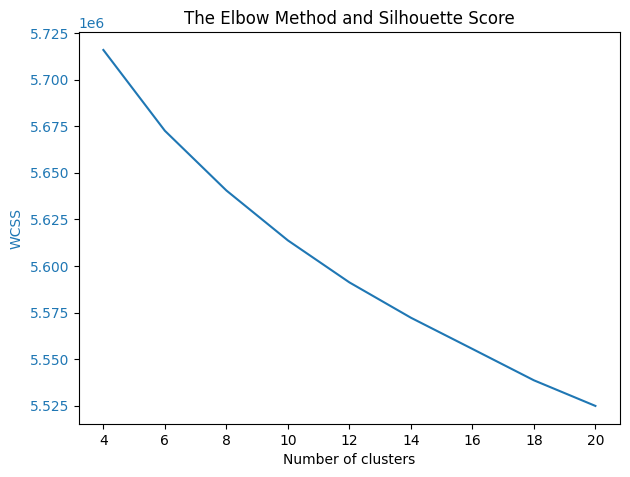

In [31]:
plot_wcss_silhouette(df)

almost constant , no need for WCSS or Silhouette (the data is totally random)

In [32]:
import seaborn as sns

In [33]:
def visualize_clusters_with_pca(df , labels):

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df)

    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set2', s=100, alpha=0.7)
    plt.title(f'Clusters visualized with PCA ')
    plt.show()

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


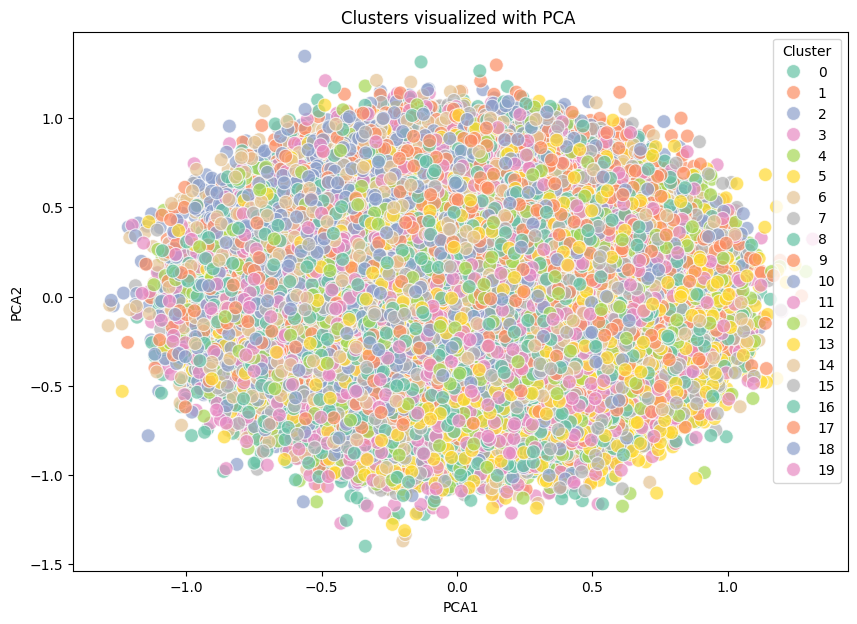

In [34]:
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df)

visualize_clusters_with_pca(df , labels)

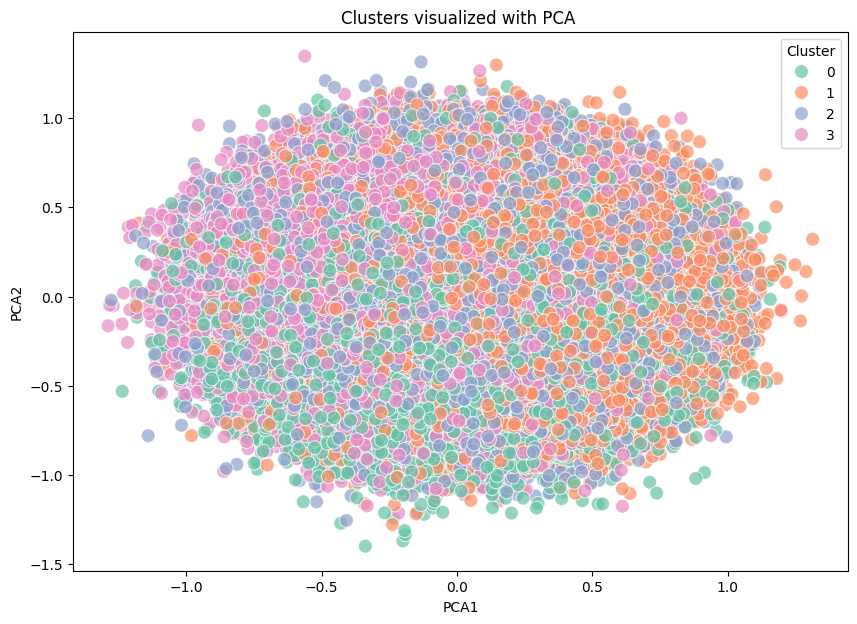

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df)

visualize_clusters_with_pca(df , labels)

no need to have specific #clusters -> will care about the size of the index file only  

In [46]:
50*(1024**2)/ (ELEMENT_SIZE*DIMENSION)

187245.7142857143

In [ ]:
# For 1 million rows: 3,000 clusters
# For 10 million rows: 9,500 clusters
# For 15 million rows: 11,500 clusters
# For 20 million rows: 13,500 clusters

In [43]:
# Assuming binary file contains float32 data
data = np.fromfile('saved_db.dat', dtype=np.float32)
data = data.reshape(-1, 70)
data.shape

(100, 70)

In [50]:
data[0]

array([0.08925092, 0.773956  , 0.6545715 , 0.43887842, 0.43301523,
       0.8585979 , 0.08594561, 0.697368  , 0.20146948, 0.09417731,
       0.52647895, 0.9756223 , 0.73575234, 0.7611397 , 0.71747726,
       0.78606427, 0.51322657, 0.12811363, 0.8397482 , 0.45038593,
       0.5003519 , 0.370798  , 0.1825496 , 0.92676497, 0.78156745,
       0.6438651 , 0.40241432, 0.8227616 , 0.5454291 , 0.44341415,
       0.45045954, 0.22723871, 0.09213591, 0.55458474, 0.8878898 ,
       0.0638172 , 0.85829127, 0.8276311 , 0.27675968, 0.6316644 ,
       0.16522902, 0.7580877 , 0.70052296, 0.35452592, 0.06791997,
       0.970698  , 0.44568747, 0.89312106, 0.677919  , 0.7783835 ,
       0.75989944, 0.19463867, 0.36390603, 0.466721  , 0.49779153,
       0.04380375, 0.54656947, 0.15428948, 0.7433759 , 0.6830489 ,
       0.9225278 , 0.7447621 , 0.36664265, 0.9675097 , 0.41085035,
       0.32582533, 0.90553576, 0.37045968, 0.07634318, 0.4695558 ],
      dtype=float32)

In [44]:
df_dat = pd.DataFrame(data)
df_dat.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.089251,0.773956,0.654571,0.438878,0.433015,0.858598,0.085946,0.697368,0.201469,0.094177,...,0.922528,0.744762,0.366643,0.967510,0.410850,0.325825,0.905536,0.370460,0.076343,0.469556
1,0.795680,0.189471,0.462941,0.129921,0.686478,0.475705,0.330196,0.226909,0.564500,0.669814,...,0.565373,0.553579,0.090566,0.559207,0.794913,0.303950,0.602838,0.030818,0.347499,0.436717
2,0.982738,0.214585,0.276548,0.408529,0.992666,0.853403,0.034693,0.233939,0.821674,0.058303,...,0.366264,0.908581,0.495066,0.699707,0.457417,0.265870,0.764229,0.969176,0.263525,0.778751
3,0.261140,0.716890,0.789007,0.449361,0.736920,0.272242,0.079253,0.096391,0.447024,0.902602,...,0.294753,0.022804,0.151498,0.958559,0.418155,0.482303,0.467108,0.782735,0.064957,0.082730
4,0.275847,0.486658,0.671124,0.490707,0.441168,0.937826,0.161019,0.571728,0.542245,0.473489,...,0.634831,0.290918,0.621860,0.515057,0.905532,0.255965,0.991383,0.936044,0.180702,0.164608


In [48]:
clustering = KMeans(n_clusters=10, n_init=1, verbose=True,batch_size=4096)
clustering.fit(data)
print('after clustering')
labels = clustering.predict(data)
centroids = clustering.cluster_centers_
print('before save clusters')


Init 1/1 with method k-means++
Inertia for init 1/1: 800.715087890625
Minibatch step 1/100: mean batch inertia: 8.693836059570312
Minibatch step 2/100: mean batch inertia: 5.090906372070313, ewa inertia: 5.090906372070313
Minibatch step 3/100: mean batch inertia: 5.0893096923828125, ewa inertia: 5.0893096923828125
Minibatch step 4/100: mean batch inertia: 4.9243600463867185, ewa inertia: 4.9243600463867185
Minibatch step 5/100: mean batch inertia: 5.1515966796875, ewa inertia: 5.1515966796875
Minibatch step 6/100: mean batch inertia: 5.016323852539062, ewa inertia: 5.016323852539062
Minibatch step 7/100: mean batch inertia: 4.727575378417969, ewa inertia: 4.727575378417969
Minibatch step 8/100: mean batch inertia: 4.996378173828125, ewa inertia: 4.996378173828125
Minibatch step 9/100: mean batch inertia: 5.000672302246094, ewa inertia: 5.000672302246094
Minibatch step 10/100: mean batch inertia: 4.926894226074219, ewa inertia: 4.926894226074219
Minibatch step 11/100: mean batch inertia

In [49]:
centroids.shape

(10, 70)

In [54]:
def append_vectors(file_path, new_vectors):
    """
    Append new vectors directly to a binary file.

    Args:
        file_path (str): Path to the binary file.
        new_vectors (np.ndarray): The new vectors to append (2D array).
    """


    # Append directly to the binary file
    with open(file_path, 'ab') as f:  # 'ab' mode ensures appending in binary format
        f.write(new_vectors.tobytes())  # Write the binary representation of the array

In [55]:
append_vectors('saved_db.dat', data[0])

In [56]:
data = np.fromfile('saved_db.dat', dtype=np.float32)
data = data.reshape(-1, 70)
data.shape

(102, 70)

In [ ]:
def clusters_files( rows):

    cluster_files = open("representers7", "ab") 
    print("Before writing clusters in binary format")
    for i in range(len(rows)):
        row_data = np.hstack(([i], rows[i])).astype(np.float32).tobytes()
        cluster_files.write(row_data)

    # for f in cluster_files:
    #     f.close()
    cluster_files.close()

In [120]:
row=data[0:5]
clusters_files(row)

Before writing clusters in binary format


In [4]:
rp = np.fromfile('saved_db/cluster0', dtype=np.float32)
rp = rp.reshape(-1, 71)
rp.shape

(58, 71)

In [5]:
df_rp = pd.DataFrame(rp)
df_rp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,9.0,0.736945,0.327496,0.433897,0.379464,0.182916,0.685743,0.235446,0.296876,0.792752,...,0.996660,0.795115,0.931371,0.946027,0.090105,0.253383,0.721857,0.590076,0.050146,0.095049
1,46.0,0.699529,0.253035,0.775613,0.775791,0.608301,0.771849,0.578823,0.378318,0.737880,...,0.086976,0.754573,0.969510,0.097788,0.414052,0.468231,0.131013,0.200562,0.173755,0.185375
2,281.0,0.413918,0.008684,0.579047,0.170395,0.415976,0.471047,0.074219,0.850540,0.510349,...,0.937886,0.423530,0.575796,0.000571,0.310085,0.786150,0.330685,0.166170,0.090661,0.924916
3,750.0,0.549686,0.372365,0.752297,0.130475,0.254761,0.230762,0.920747,0.535024,0.164227,...,0.495453,0.853080,0.555891,0.028779,0.125504,0.818212,0.423352,0.703940,0.892625,0.088460
4,795.0,0.067760,0.074113,0.985537,0.281947,0.381540,0.296988,0.156785,0.071021,0.135364,...,0.561226,0.499698,0.501302,0.536624,0.929116,0.411525,0.224347,0.064085,0.870792,0.180213
5,980.0,0.686741,0.103637,0.271875,0.986038,0.168616,0.971729,0.292619,0.384599,0.937399,...,0.523714,0.919186,0.896625,0.963218,0.220373,0.736969,0.751624,0.449931,0.168351,0.292971
6,1107.0,0.126568,0.726618,0.377868,0.319175,0.666810,0.060455,0.168050,0.833095,0.985618,...,0.860373,0.937658,0.875954,0.324963,0.085304,0.958043,0.545729,0.972801,0.167340,0.942975
7,1195.0,0.789600,0.165912,0.206139,0.632485,0.993837,0.401257,0.911484,0.017409,0.736928,...,0.207657,0.456242,0.809230,0.235212,0.393551,0.598045,0.200867,0.592903,0.614648,0.530920
8,1517.0,0.157181,0.377789,0.327491,0.585567,0.904347,0.043270,0.837667,0.274215,0.651454,...,0.836765,0.566731,0.998181,0.393106,0.126813,0.469270,0.832931,0.526712,0.611357,0.800871
9,1562.0,0.447539,0.116292,0.652153,0.723509,0.072669,0.250924,0.648308,0.248668,0.853939,...,0.826051,0.516858,0.404544,0.456406,0.293738,0.977845,0.525925,0.262669,0.895147,0.957780
